# Analysis of Dependency Parsing Results

This notebook provides a detailed analysis of dependency parsing results obtained from **CoNLL-U** files. The analysis will focus on the frequency of **parts of speech (POS)**, **dependency relations (DepRel)**, and the **length of Elementary Discourse Units (EDUs)**.

By visualizing and interpreting these statistics, I aim to gain a deeper understanding of the syntactic structure of the discourse data.


## 1. Reading CoNLL-U Files

First, we will read the **CoNLL-U** files, which contain the parsed dependency structure of each Elementary Discourse Unit (EDU). Each file represents a set of EDUs with their tokens, dependencies, and other syntactic features.

We will convert these files into a pandas DataFrame for easier manipulation and analysis.


In [6]:
import pandas as pd
import os

# Function to read CoNLL-U file and convert it into a pandas DataFrame
def read_conllu(file_path):
    """
    Reads a CoNLL-U file and returns a pandas DataFrame.
    """
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()

    data = []
    # Process each line in the CoNLL-U file
    for line in lines:
        # Skip comment lines (those starting with '#') and empty lines
        if line.startswith('#') or line.strip() == '':
            continue
        tokens = line.strip().split('\t')  # Split the line by tabs
        if len(tokens) == 10:  # CoNLL-U format has 10 columns per token
            data.append(tokens)

    # Create a DataFrame with columns based on CoNLL-U format
    columns = ['ID', 'Form', 'Lemma', 'POS', 'Feats', 'Head', 'DepRel', 'SpaceAfter', 'Misc', 'Empty']
    df = pd.DataFrame(data, columns=columns)
    return df

# Path to the directory containing parsed CoNLL-U files
input_folder = '../parsed_results'

# Variable to limit to the first 3 files
processed_files_count = 0

# Loop through parsed CoNLL-U files and analyze them
for filename in os.listdir(input_folder):
    if filename.endswith('_parsed.conllu'):  # Only process parsed CoNLL-U files
        
        # Process only the first 3 files to save time and space
        if processed_files_count < 3:
            file_path = os.path.join(input_folder, filename)
            
            # Read the CoNLL-U file into a pandas DataFrame
            df = read_conllu(file_path)
            
            # Display summary information about the DataFrame
            print(f"Processing file: {filename}")
            df.info()  # Summary of DataFrame structure

            # Display only the first 10 rows of selected columns to reduce output size
            display(df[['Form', 'POS', 'DepRel']].head(10))  # Show the first 10 rows for 'Form', 'POS', 'DepRel'
            
            processed_files_count += 1  
        else:
            break  # Stop processing after the first 3 files 


Processing file: maz-14055_parsed.conllu
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          178 non-null    object
 1   Form        178 non-null    object
 2   Lemma       178 non-null    object
 3   POS         178 non-null    object
 4   Feats       178 non-null    object
 5   Head        178 non-null    object
 6   DepRel      178 non-null    object
 7   SpaceAfter  178 non-null    object
 8   Misc        178 non-null    object
 9   Empty       178 non-null    object
dtypes: object(10)
memory usage: 14.0+ KB


,Form,POS,DepRel
0,Zwei,NUM,2
1,Wahrheiten,NOUN,2
2,Man,PRON,2
3,muss,AUX,2
4,über,ADP,7
5,keine,DET,6
6,großen,ADJ,6
7,Prognosequalitäten,NOUN,3
8,verfügen,VERB,2
9,",",PUNCT,2


Processing file: maz-15347_parsed.conllu
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          204 non-null    object
 1   Form        204 non-null    object
 2   Lemma       204 non-null    object
 3   POS         204 non-null    object
 4   Feats       204 non-null    object
 5   Head        204 non-null    object
 6   DepRel      204 non-null    object
 7   SpaceAfter  204 non-null    object
 8   Misc        204 non-null    object
 9   Empty       204 non-null    object
dtypes: object(10)
memory usage: 16.1+ KB


,Form,POS,DepRel
0,Unterschiede,NOUN,1
1,Auch,ADV,2
2,bei,ADP,7
3,den,DET,4
4,Senioren,NOUN,2
5,hatte,AUX,5
6,sie,PRON,5
7,zugeschlagen,VERB,5
8,:,PUNCT,5
9,die,DET,10


Processing file: maz-18914_parsed.conllu
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          210 non-null    object
 1   Form        210 non-null    object
 2   Lemma       210 non-null    object
 3   POS         210 non-null    object
 4   Feats       210 non-null    object
 5   Head        210 non-null    object
 6   DepRel      210 non-null    object
 7   SpaceAfter  210 non-null    object
 8   Misc        210 non-null    object
 9   Empty       210 non-null    object
dtypes: object(10)
memory usage: 16.5+ KB


,Form,POS,DepRel
0,Alarmsignal,NOUN,1
1,Mit,ADP,4
2,Helga,PROPN,3
3,Kaden,PROPN,1
4,streicht,VERB,4
5,eine,PRON,4
6,der,DET,8
7,namhaftesten,ADJ,8
8,Geschäftsleute,NOUN,5
9,der,DET,10


## 2. Part of Speech (POS) Analysis

The first step in our analysis is to look at the frequency of **Parts of Speech (POS)** in the parsed EDUs. This will give us insight into the syntactic structure of the discourse.

We will count how often each part of speech occurs and visualize the results using a bar plot.


Part of Speech Frequency:


POS
NOUN     37
DET      31
PUNCT    28
ADV      27
PRON     17
VERB     16
ADP      15
ADJ      15
AUX      15
PART      3
PROPN     2
SCONJ     2
CCONJ     2
Name: count, dtype: int64

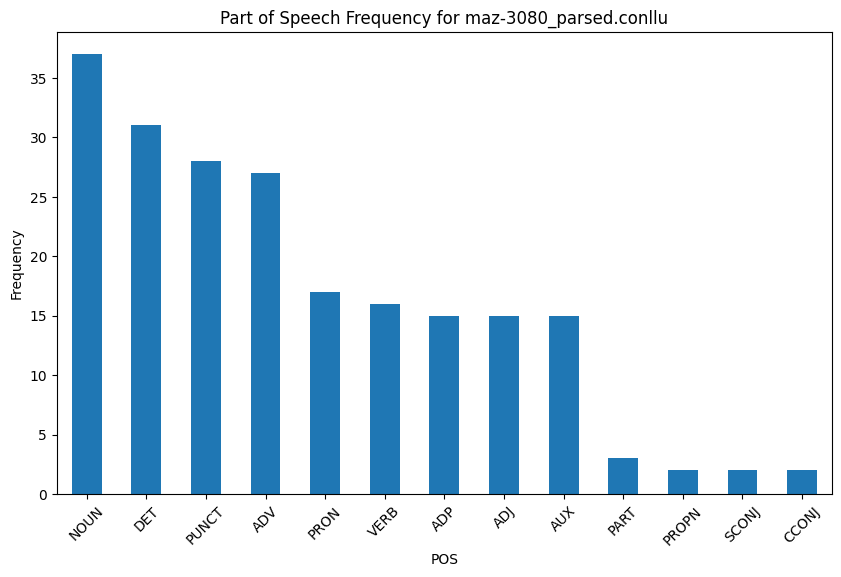

In [7]:
import matplotlib.pyplot as plt


# Analyze the frequency of parts of speech (POS)
pos_counts = df['POS'].value_counts()

# Print POS frequency and create a bar plot
print("Part of Speech Frequency:")
display(pos_counts)

# Plot the frequency of parts of speech
pos_counts.plot(kind='bar', figsize=(10, 6))
plt.title(f'Part of Speech Frequency for {filename}')
plt.xlabel('POS')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


## 3. Dependency Relation (DepRel) Analysis

Next, we will analyze the **Dependency Relations (DepRel)** in the parsed sentences. Understanding the syntactic relationships between tokens helps in identifying the structure of EDUs.

We will count the frequency of each dependency relation and visualize the results using a bar plot.


Dependency Relation Frequency:


DepRel
6     30
4     28
2     28
3     26
1     19
8     14
9     14
5     13
10    12
12     7
14     7
11     6
13     4
7      2
Name: count, dtype: int64

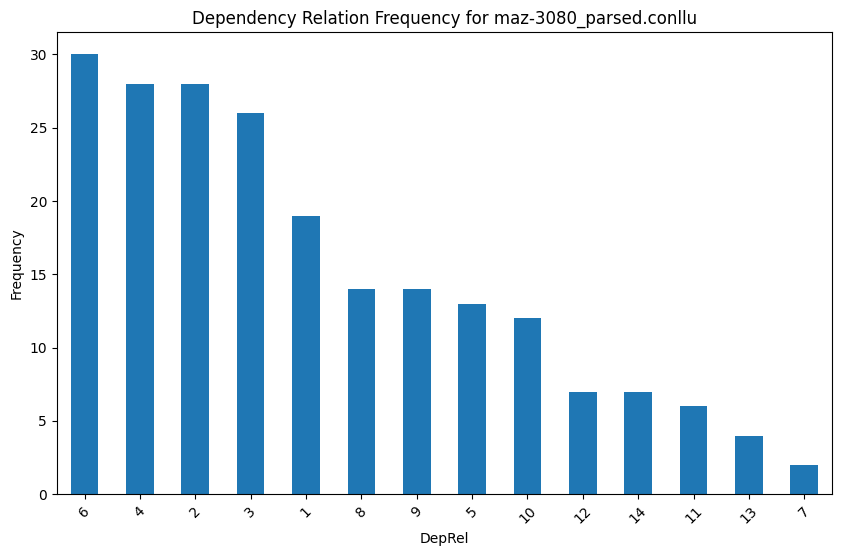

In [8]:
# Analyze the frequency of dependency relations (DepRel)
deprel_counts = df['DepRel'].value_counts()

# Print dependency relation frequency and create a bar plot
print("Dependency Relation Frequency:")
display(deprel_counts)

# Plot the frequency of dependency relations
deprel_counts.plot(kind='bar', figsize=(10, 6))
plt.title(f'Dependency Relation Frequency for {filename}')
plt.xlabel('DepRel')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


## 4. EDU Length Distribution

We will look at the **length of each EDU** (i.e., the number of tokens in each EDU). This will help us understand the typical length of a discourse unit and whether they tend to be short or long.

We will plot a histogram to visualize the distribution of EDU lengths.


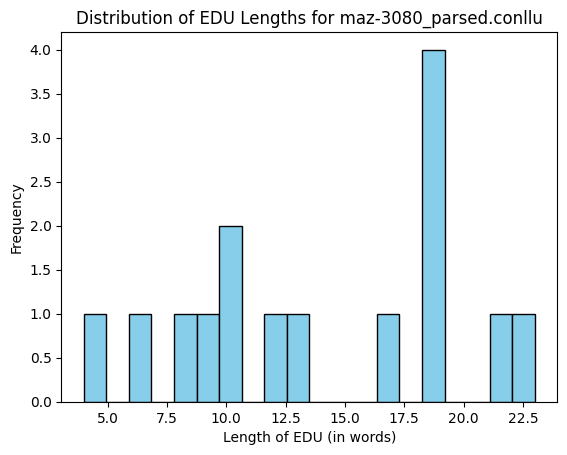

In [9]:
# Analyze the length of EDU (sentence length)
edu_lengths = df.groupby('ID')['Form'].apply(lambda x: len(x)).tolist()

# Plot the distribution of EDU lengths
plt.hist(edu_lengths, bins=20, color='skyblue', edgecolor='black')
plt.title(f'Distribution of EDU Lengths for {filename}')
plt.xlabel('Length of EDU (in words)')
plt.ylabel('Frequency')
plt.show()


## 5. Saving the Results

We will save the analyzed data to a **CSV file**. This allows for further processing or inspection at a later stage. Each analysis result will be stored separately for each CoNLL-U file.


In [10]:

output_file = os.path.join(input_folder, f'{filename.replace(".conllu", "")}_analysis.csv')
df.to_csv(output_file, index=False)
print(f"Analysis saved for {filename} to {output_file}")


Analysis saved for maz-3080_parsed.conllu to ../parsed_results/maz-3080_parsed_analysis.csv
